## Numpy 리뷰


### 행렬, 벡터의 생성과 참조

#### numpy의 설치
    - 가상환경의 선택 (가상환경의 이름이 *tf2*입니다)
        conda activate tf2
    - 선택한 가상환경에 numpy 패키지 설치
        conda install numpy
    - Anaconda 설치 경로의 확인
        %userprofile\anaconda3\envs

#### 벡터와 행렬의 생성
    - numpy.array 
        + 리스트를 이용한 벡터의 생성
        + numpy.zeros(), numpy.ones()
        + numpy.repeat()
        + 리스트를 이용한 행렬의 생성
    - 대각행렬 생성하기 
        + numpy.diag()

#### 벡터와 행렬의 형태 변환
    - shape 이해하기
    - reshape 이해하기 (order = ‘C’ or ‘F’)


import numpy as  np

# 객체 생성
a = np.array([1,2,3,4])
a

In [7]:
import numpy as np

In [11]:
a = np.array([1,2,3,4])
print(a)

[1 2 3 4]


In [10]:
# 속성확인
a.shape

(4,)

[0 1 2 3 4 5 6 7 8 9]
[1 2 3 4]
[[1 2 3]
 [4 5 6]]
[[1 2 3]]


C:\Users\jjjeo\AppData\Local\Temp\ipykernel_8448\2666280296.py:84: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


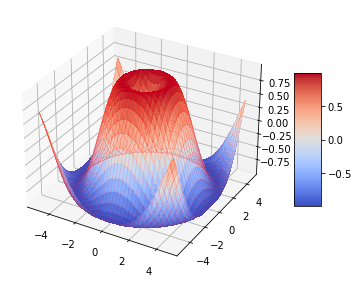

241

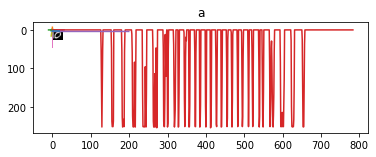

In [12]:

a = np.array(range(10))
print(a)
a = np.array((1,2,3,4))
print(a)
#%%
a = np.array([[1,2,3],[4,5,6]])
print(a)
a.shape
a = np.array([[1,2,3]])
print(a)
a.shape
a = np.array([[1],[2],[3]])
a.shape
#%%
## shape 
a = np.array(range(12))
a
a.reshape((4,3))
a.reshape((2,6))
## shape + order 
a.reshape((4,3), order ="C")
a.reshape((4,3), order ="F")

#%%
# ones 
np.ones(5)
np.ones((5,1))
a = np.array(range(12)).reshape((4,3))
a.shape
np.ones_like(a)

# zeros
np.zeros(5)
np.zeros((5,2))
np.zeros_like(a)


# repeat pattern: each 3
np.repeat(1,3)
# repeat pattern: each 4
np.repeat([1,3], 4)
# repeat pattern: each 2 and 3
np.repeat([1,3], [2,3])
np.repeat([[1,2,4]], 4, axis = 0)
np.repeat([1,2,4], 4, axis = 0).reshape(4,-1, order = "F")
# repeat -> tile

# equally increasing
b = np.arange(-1, 3, 0.25)
b
b = np.arange(3, -1, -0.25)
b
# eqaul spacing
b = np.linspace(0,1,11)
len(b)

# render a diagonal matrix
b = np.diag([1,2,3,4])
b
# select diagonal elements
np.diagonal(b)
#%%
# 2d grid
b = np.linspace(0,1,11)
b
x,y = np.meshgrid(b,b)
x
y
x[0,2]
y[1,0]

#%%
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%%
x=np.arange(-5,5,0.25)
y=np.arange(-5,5,0.25)
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
Z = np.sin(R)
#%%

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z,cmap='coolwarm',linewidth=0,antialiased=False)
wire = ax.plot_wireframe(X,Y,Z,color='r',linewidth=0.1)
fig.colorbar(surf,shrink=0.5,aspect=5)
fig.tight_layout()
plt.show()
#%% 
a = np.arange(12).reshape((4,3))
b = np.arange(8).reshape((4,2))
# column binding
np.concatenate((a,b), axis = 1)
# row binding
a = np.arange(12).reshape((4,3))
b = np.arange(3).reshape((1,3))
np.concatenate((a,b), axis = 0)


#%%
# probability 
import scipy.stats as sc
#%%
# normal pdf
x = np.linspace(-3,3,100)
y = sc.norm.pdf(x,1,1/2)
plt.plot(x,y,'-')
# norm cdf
y = sc.norm.cdf(x,1,1/2)
plt.plot(x,y,'-')
plt.title("a")
# quantile functions (ppf)
prob = np.linspace(0.001, 0.999, 100)
y = sc.norm.ppf(q = prob)
plt.plot(prob ,y,'-')
plt.title("a")

#%%
# chi square 
x = np.linspace(0 ,30,100)
y = sc.chi2.pdf(x,df = 10)
plt.plot(x ,y,'-')
# quantile
sc.chi2.ppf(0.95,df = 10)

#%%
# F-distribution
x = np.linspace(0 ,30,100)
y = sc.f.pdf(x,9, 10)
plt.plot(x ,y,'-')

#%%
# random number generator
np.random.uniform(size = 10)
np.random.normal(size = 20)
np.random.chisquare(df = 10, size = 10)
np.random.f(9,10, 10)

#%%
x = np.random.normal(size = 400)
plt.hist(x, bins = 20)
#%% 
np.random.seed(1)
x = np.random.normal(size = 400)
x[0]
plt.hist(x, bins = 20)


#%%
# function
x = np.linspace(-3,3, 100)
y = np.exp(x)
plt.plot(x,y,'-')
#%%
x = np.linspace(-3,3, 100)
y = x**2 - 2*x + 1
plt.plot(x,y,'-')
#%%
x = np.linspace(-3,3, 100)
y = np.abs(x)
plt.plot(x,y,'-')
#%%
x = np.linspace(-3,3, 100)
# not max! use fmax
y = 0.8*np.fmax(x,0) + 0.2*np.fmax(-x,0)
plt.plot(x,y,'-')
#%%
x = np.linspace(0.001,10, 100)
y = np.log(x)
plt.plot(x,y,'-')
#%%
x = np.linspace(-10,10, 100)
y = np.exp(x)/(1+ np.exp(x))
plt.plot(x,y,'-')
#%% 
# indexing
a = np.arange(3,100,2)
a[0]
a[:2]

b = np.arange(100).reshape((5,20))
b[3,5]
b[3,:]
b[:,3]
b[:,3:]
# step! i:j:k
b[:,3:9:2]
b[:,(2,4,6)]
b[(0,1,3),:]
#%%

# matrix

a = np.array(range(10))
a.reshape((5,2), order = 'C') # default
a.reshape((5,2), order = 'F') # like R

# discussion: memory add
# C: [0,0] -> [0,1] -> [1,0] -> [1,1] ... -> [4,0] -> [4,1]
# F: [0,0] -> [1,0] -> [2,0] -> [3,0] ... -> [4,0] -> [4,1]
    
# array
# 메모리를 할당하는 방식을 이해해야 함.
a = np.array(range(24))
a.reshape((2,3,4), order = 'C')
a.reshape((2,3,4), order = 'F')

# C:[0,0,0] -> [0,0,1] -> [0,0,2] -> 
#   [0,0,3] -> [0,1,0] -> [0,1,1] -> 
# .....

# F: [0,0,0] -> [1,0,0] -> [0,1,0] -> 
#    [1,1,0] -> [0,2,0] -> [1,2,0] -> 
#    [0,0,1] -> [1,0,1] -> [0,1,1] -> 
# .....
# 즉, fotran 방식은 array 의 3-dimension이 (d_i, d_j, d_k)일때
# [i,j,k]의 index는 d_i + j*(d_i) + k*(d_i*d_j) 에 저장된다.

# C방식은 
# [i,j,k]의 index는 i*(d_j*d_k) + j*(d_k) + d_k 에 저장된다.
#%%
import tensorflow as tf
## 사진의 변환 (C방식 reshape의 사용)
(x,_), (_,_) = tf.keras.datasets.mnist.load_data()
x.shape # default C
n = x.shape[0]
pix_dim1 = x.shape[1]
pix_dim2 = x.shape[2]
# the ith image data
i = 1
x[[i]]
x[[i]].shape

# 하나의 dimension 의 크기가 1인 경우 해당 dimension을 제거하기 위한 방법으로
# np.squeeze  를 사용함
xs = np.squeeze(x[[i]], axis = 0)
xs.shape
plt.imshow(xs, cmap='gray')


xvec = x.reshape((n, pix_dim1*pix_dim2))
xvec[[i]]
xvec[[i]].shape
xv = np.squeeze(xvec[[i]], axis = 0)
plt.plot(xv)



# product braodcasting
# row-wise product
# 행의 크기가 클 때, 행마다 같은 상수를 곱해야 하는 경우:
# 상수 곱에 해당하는 대각 행렬의 크기가 매우 커지는 문제가 발생
# 행렬로 반복문을 사용하면 속도가 저하.
# 다음과 같이 해결한다.
 
x = np.array(range(15)).reshape((5,3))
z = np.array(range(5)).reshape((5,1))
x
z
x*z

# 열별로 같은 상수를 곱해야 하는 경우 다음과 같이 해결함
x = np.array(range(15)).reshape((5,3))
z = np.array(range(3)).reshape((1,3))
x
z
x*z

# operation
# addition on vectors
x = np.random.uniform(size = 10)
y = np.random.uniform(size = 10)
x + y
x-y 
3*x - 2*y
x**2

# addition on matrix
x = np.random.uniform(size = (5,5))
y = np.random.uniform(size = (5,5))
x + y
3*x - 2*y

# matrix multiplication
x@y

# Transpose
A = np.array(range(0,6)).reshape((2,3))
B = np.array(range(8,20)).reshape((3,4))
A.T
B
(A@B).T
(B.T)@(A.T)


# Trace
A = np.array(range(16)).reshape((4,4))
B = np.array(range(16,32)).reshape((4,4))

np.trace(A)
np.trace(A) +  np.trace(B)

k = 2
np.trace(k*A)
k*np.trace(A)


A = np.array(range(24)).reshape((4,6))
B = np.array(range(24,48)).reshape((6,4))
np.trace(A@B)
np.trace(B@A)

np.trace(A.T@A)
np.trace(A@A.T)
(A**2).sum()

# inverse matrix
A = np.array(range(4)).reshape((2,2))
B = np.linalg.inv(A) 
A@B
B@A

A = np.array(range(4)).reshape((2,2))
B = np.array(range(4,8)).reshape((2,2))
np.linalg.inv(A@B)
np.linalg.inv(B)@np.linalg.inv(A)
np.linalg.inv(A.T)
(np.linalg.inv(A)).T

# 
n = 10 
p = 4
A = np.random.normal(0,1,n*p).reshape((n,p))
x = np.random.normal(0,1,p)
A@x

# more precise expression
x = x.reshape((p,1))
A@x



#  spaned space
np.random.seed(1)
W = np.random.gamma(1,1,(10,3)).round(2)
W
a = np.random.gamma(1,1,3).round(2)
a
W@a
x[0]*W[:,0] + x[1]*W[:,1] + x[2]*W[:,2]

#  orthogonal projection (page 48)
np.random.seed(1)
Y = np.random.gamma(1,1,(5,2)).round(2)
proj_Y = Y@np.linalg.inv(Y.T@Y)@Y.T
proj_Y.shape

proj_Y
proj_Y@proj_Y
x = np.random.normal(0,1,5).round(2)
proj_Y@x
x - proj_Y@x
(proj_Y@x*(x - proj_Y@x)).sum()

# eigendecomposition (page 51)
np.random.seed(1)
tmpA = np.random.gamma(1,1,(3,3)).round(2)
A = tmpA + tmpA.T

eig_fit = np.linalg.eig(A)
type(eig_fit)
eig_fit[0] # eigen value
eig_fit[1] # eigen vector

d = eig_fit[0]
E = eig_fit[1]

eig_fit[1]@np.diag(eig_fit[0])@eig_fit[1].T
A

(E[:,0]*E[:,1]).sum()
(E[:,0]*E[:,0]).sum()
E1 = E[:,[0]]@E[:,[0]].T
# note: eig_fit[1][:,0] 대신 eig_fit[1][:,[0]] 를 사용하면, dimension collapsing  을 방지해준다. 
E2 = E[:,[1]]@E[:,[1]].T
E3 = E[:,[2]]@E[:,[2]].T

d[0]*E1 + d[1]*E2 + d[2]*E3
A


#%% 
# law of large numbers
iter_num = np.linspace(100, 1000000, 200)
iter_num = iter_num.astype('int')
n=100
mean_vec = np.zeros(len(iter_num))
for i, n in enumerate(iter_num):
    x = np.random.chisquare(df = 4, size = n)
    mean_vec[i] = x.mean()
    
plt.plot(mean_vec,'-')
plt.hlines(4,-1,20)
# %%
1-69/310
310-69

### 행렬, 벡터의 원소 참조

### 행렬의 연산